Import firedrake and icepack. Initialize simple mesh.

In [2]:
import firedrake
import icepack
import matplotlib.pyplot as plt
import numpy as np

Lx = 10
nx = 10

mesh = firedrake.IntervalMesh(nx, Lx)
Q = firedrake.FunctionSpace(mesh, "CG", 1)
V = firedrake.VectorFunctionSpace(mesh, "CG", 1)

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


Define initial geometry.

In [3]:
from firedrake import max_value, min_value

#x,z = firedrake.SpatialCoordinate(mesh)
x, = firedrake.SpatialCoordinate(mesh)

h0 = firedrake.interpolate(x**2,Q);

Plot profile and use some point evals.

[  0.   1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
[array(1.), array(1.6), array(2.2), array(2.8), array(3.4), array(4.)]


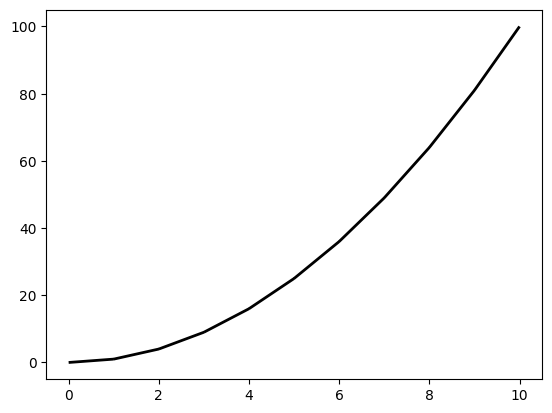

In [4]:
fig, axes = plt.subplots()
firedrake.plot(h0, axes=axes);
print(h0.dat.data_ro)
h0_test = h0.at(1,1.2,1.4,1.6,1.8,2)
print(h0_test)

Resize mesh coordinates.

In [6]:
Lx1 = 5

mesh.coordinates.dat.data[:] *= Lx1/Lx
mesh.clear_spatial_index()
mesh.clear_cell_sizes()

# Vc = mesh.coordinates.function_space()
# x1, = firedrake.SpatialCoordinate(mesh)
# f = firedrake.Function(Vc).interpolate(firedrake.as_vector([x]))
# mesh.coordinates.assign(f);

#print(h0.dat.data_ro)

Get section of h0 function over the new coordinate space.

In [7]:
print(x)
print(firedrake.SpatialCoordinate(mesh))
# dir(x)

x[0]
x


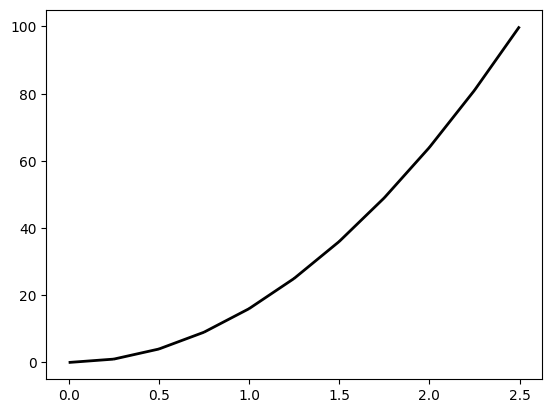

In [9]:
h1 = firedrake.interpolate(h0,Q);
# h1 = firedrake.Function(firedrake.functionspaceimpl.WithGeometry.create(h0.function_space(), mesh), val=h0.topological)
fig, axes = plt.subplots()
firedrake.plot(h1, axes=axes);

#test = h0.at(x)

#h1 = firedrake.interpolate(h0.at(x),Q)
#print(h0.dat.data_ro)
#print(h1.dat.data_ro)
#print(h0.at(x))